Midterm JEM207- Josefína Schusterová

In [17]:
import json
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import os
import datetime
from IPython.core.display import HTML, display

Part 1 - API requests

In [18]:
url="https://ies-midterm.soulution.rocks/login"
payload={"cuni":"68072775"}
result=requests.post(url, json=payload).json()
result

{'data': {'personal_code': 'fa026097',
  'dataset_ids': ['ce92a7afca',
   '3e8641892a',
   'fc1e690fcf',
   'f45ec2e9fc',
   '8c34bdfc03',
   'f894683be9',
   '8a310226b3',
   '2d1aef30ed',
   '0a42bff0a1']},
 'message': 'Hello, Schusterová Josefína! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [19]:
print('Here is my personal code:' +result['data']['personal_code'])

Here is my personal code:fa026097


In [20]:
list_of_data=[]
for x in result['data']['dataset_ids']:
    get=requests.get(f"https://ies-midterm.soulution.rocks/data/{x}")
    g=get.json()
    #there is an error
    while g["message"]=='Error [503] - Sorry, I just slipped and fell. Thank God, I am made of silicon. You need to work this out.':     
        get=requests.get(f"https://ies-midterm.soulution.rocks/data/{x}")
        g=get.json()
        list_of_data.append(get)
    
list_of_data

[<Response [503]>, <Response [503]>, <Response [503]>, <Response [200]>]

In [21]:
g["message"]

'Columns are in order Date,Open,High,Low,Close,Adj.Close,Volume. Make sure your data are ordered.'

In [22]:
g

{'data': {'company': 'SGRO',
  'data': [['2019-03-01',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0'],
   ['2019-03-04',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0'],
   ['2019-03-05',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0.20999999344348907',
    '0'],
   ['2019-03-06',
    '0.1550000011920929',
    '0.1550000011920929',
    '0.1550000011920929',
    '0.1550000011920929',
    '0.1550000011920929',
    '1300'],
   ['']]},
 'message': 'Columns are in order Date,Open,High,Low,Close,Adj.Close,Volume. Make sure your data are ordered.'}

In [23]:
g['data']['data']

[['2019-03-01',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0'],
 ['2019-03-04',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0'],
 ['2019-03-05',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0.20999999344348907',
  '0'],
 ['2019-03-06',
  '0.1550000011920929',
  '0.1550000011920929',
  '0.1550000011920929',
  '0.1550000011920929',
  '0.1550000011920929',
  '1300'],
 ['']]

I did not know how to continue, no time left :(

In [24]:
url="https://ies-midterm.soulution.rocks/saveme"
payload={"cuni":"68072775"}
result=requests.post(url, json=payload).json()
result

{'data': {},
 'message': 'DO NOT SHARE THE DATASET WITH ANYONE! Download manually the following file which contains the data: https://ies-python-midterm.s3.eu-central-1.amazonaws.com/sos.zip'}

In [25]:
dataframe=pd.read_csv('EVR.csv').set_index('Date')
dataframe['Company'] = g['data']['company']

dataframe

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2019-01-02,70.110001,74.230003,69.980003,73.839996,69.908577,725100,SGRO
2019-01-03,73.379997,75.589996,72.930000,73.669998,69.747620,790200,SGRO
2019-01-04,74.800003,76.860001,74.599998,76.440002,72.370148,607900,SGRO
2019-01-07,74.449997,76.260002,73.150002,75.010002,71.016281,783700,SGRO
2019-01-08,76.500000,77.589996,74.889999,77.150002,73.042351,771300,SGRO
...,...,...,...,...,...,...,...
2020-11-16,89.290001,89.610001,86.919998,88.690002,88.690002,370900,SGRO
2020-11-17,87.879997,89.550003,87.570000,88.839996,88.839996,309400,SGRO
2020-11-18,89.180000,90.690002,88.279999,88.309998,88.309998,334200,SGRO


In [28]:
company = []
company.append(g['data']['company'])
dataframe = dataframe.dropna()
dataframe = dataframe.sort_index()

The dates of the dataset are not from 2019-01-02 to 2020-11-20. No data are misssing.

In [30]:
a=dataframe['Company'].unique()
a
for i in a:
    print(dataframe[dataframe['Company']==i].head(1),dataframe[dataframe['Company']==i].tail(1) )

                 Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
2019-01-02  70.110001  74.230003  69.980003  73.839996  69.908577  725100   

           Company  
Date                
2019-01-02    SGRO                    Open   High        Low      Close  Adj Close  Volume Company
Date                                                                         
2020-11-20  87.980003  88.57  87.160004  88.309998  88.309998  196500    SGRO


Day when the highest number of shares was traded

In [31]:
c=dataframe.groupby("Date")['Volume'].sum()
c_df=pd.DataFrame(c, columns=['Volume'])
print(c_df[c_df['Volume']==c.max()])

             Volume
Date               
2019-01-30  2047600


Highest and lowest Adj Close price per company

In [33]:
for z in company: #nebo in a
    df_company = dataframe[dataframe['Company']==z]
    print(z ,df_company['Adj Close'].max(), df_company['Adj Close'].min())

SGRO 93.30607604980467 35.08083724975586


Total of shares traded

In [34]:
total_shares=dataframe.groupby('Company')['Volume'].sum()
total_shares_df=pd.DataFrame(total_shares, columns=['Volume'])
total_shares_df.rename({'Volume':'Total shares'},axis='columns')

,Total shares
Company,
SGRO,237506800


Create a single object with Adjusted Close prices, plot them together in one time series plot.

In [35]:
dataframe.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2019-01-02,70.110001,74.230003,69.980003,73.839996,69.908577,725100,SGRO
1,2019-01-03,73.379997,75.589996,72.930000,73.669998,69.747620,790200,SGRO
2,2019-01-04,74.800003,76.860001,74.599998,76.440002,72.370148,607900,SGRO
3,2019-01-07,74.449997,76.260002,73.150002,75.010002,71.016281,783700,SGRO
4,2019-01-08,76.500000,77.589996,74.889999,77.150002,73.042351,771300,SGRO
...,...,...,...,...,...,...,...,...
473,2020-11-16,89.290001,89.610001,86.919998,88.690002,88.690002,370900,SGRO
474,2020-11-17,87.879997,89.550003,87.570000,88.839996,88.839996,309400,SGRO
475,2020-11-18,89.180000,90.690002,88.279999,88.309998,88.309998,334200,SGRO
476,2020-11-19,87.820000,88.550003,87.250000,88.489998,88.489998,166300,SGRO


In [45]:
sgro=dataframe[dataframe['Company']=='SGRO']
sgro_df=pd.DataFrame(sgro)


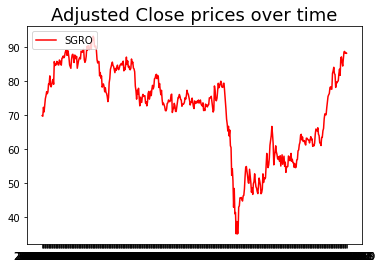

In [44]:
plt.title('Adjusted Close prices over time',fontsize=18, color='black')

plt.plot(sgro_df['Adj Close'],label='SGRO', color='red')

plt.legend(loc=2)
plt.show()